In [1]:
import nltk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('train.csv',dtype=str)

In [4]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [5]:
type(['Computer Science'])


list

In [6]:
df.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [8]:
df['Title Length'] = df['TITLE'].apply(len)
df['Abstract Length'] = df['ABSTRACT'].apply(len)

In [9]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Title Length,Abstract Length
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,43,1912
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,34,513
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,70,668
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,91,783
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,142,860


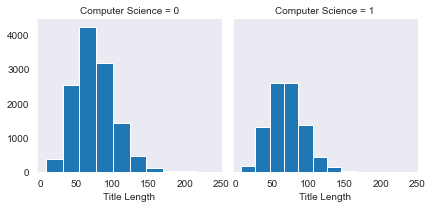

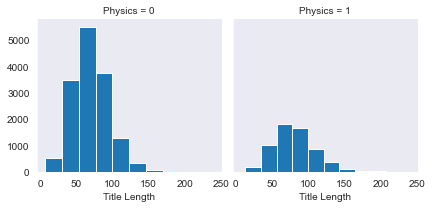

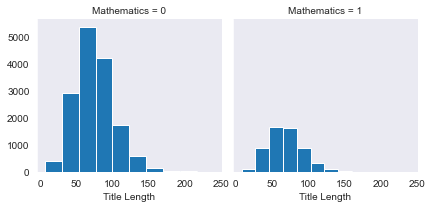

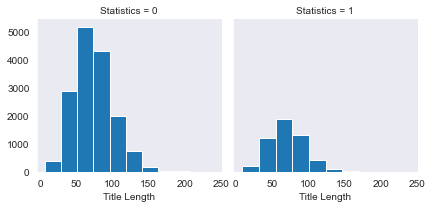

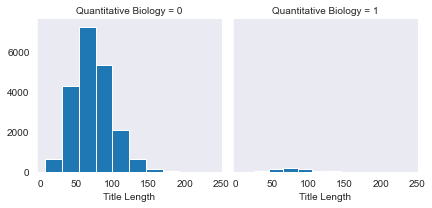

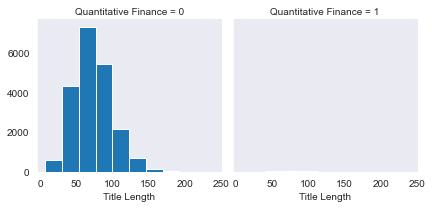

In [10]:
x = ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']
y = ['Title Length']



for x in x:    
    vis = sns.FacetGrid(df,col= x)
    vis.map(plt.hist,y[0])

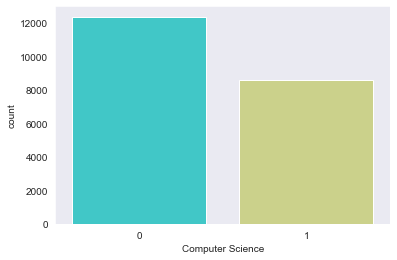

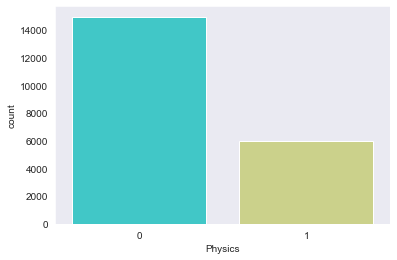

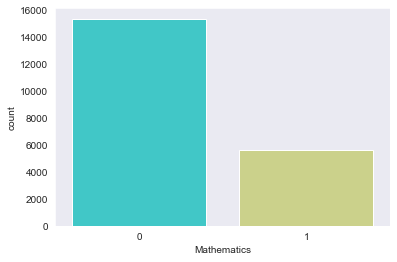

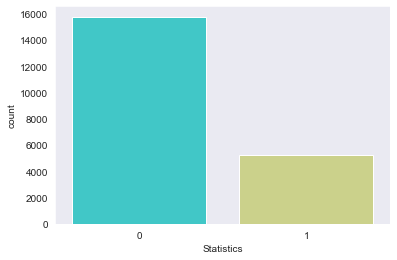

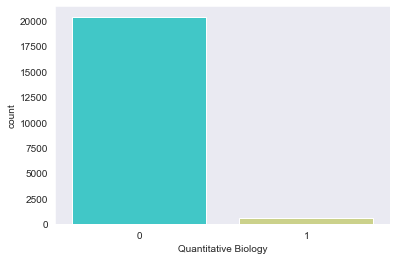

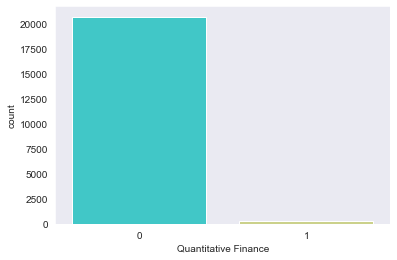

In [11]:
x = ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']
for i in x:  
    sns.countplot(x=i,data=df,palette='rainbow')
    plt.show()

In [12]:
df1 = df.iloc[:,3:9]

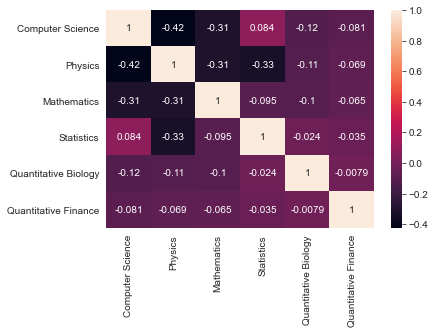

In [13]:
sns.heatmap(df1.corr(),annot=True)

In [14]:
import string
X_title = df['TITLE'].tolist()
X_abstract = df['ABSTRACT'].tolist()

df['main'] = df['TITLE'] + df['ABSTRACT']
y_beforesplit = df.iloc[:,3:9]
y_beforesplit.shape

(20972, 6)

In [20]:
feat = pd.read_csv('features')
features = feat.iloc[:,9:]

### COUNTVECTORIZER

In [16]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import re
from sklearn.feature_extraction.text import CountVectorizer


def remove_punc(df):
    """Remove Punctuation,Special Character and Numbers """

    nopunc = [char for char in df if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return (nopunc)


X_title = df['main'].apply(lambda x:remove_punc(x))
#X_title = X_title.apply(lambda x:re.sub('[^A-Za-z0-9]+', ' ', x))

X_title = X_title.apply(lambda x:re.sub(r'\b\w{1,1}\b', '', x))#To remove words less than 2 letters
X_title = X_title.apply(lambda x: x.lower())

X_title = X_title.tolist()



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1, 2),stop_words="english",lowercase=True,use_idf=True) 
 
# just send in all your docs here 
X1=tfidf_vectorizer.fit_transform(X_title)
title_vocab = tfidf_vectorizer.get_feature_names()

<20972x1320947 sparse matrix of type '<class 'numpy.float64'>'
	with 3156446 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y_beforesplit,test_size=0.25,shuffle=False)

In [26]:
y_cs = y_train['Computer Science'].values
y_phy = y_train['Physics'].values
y_mat = y_train['Mathematics'].values
y_stat = y_train['Statistics'].values
y_qbio = y_train['Quantitative Biology'].values
y_qfin = y_train['Quantitative Finance'].values

In [27]:
y_cs_test = y_test['Computer Science'].values
y_phy_test = y_test['Physics'].values
y_mat_test = y_test['Mathematics'].values
y_stat_test = y_test['Statistics'].values
y_qbio_test = y_test['Quantitative Biology'].values
y_qfin_test = y_test['Quantitative Finance'].values

In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
import seaborn as sns
%matplotlib inline

def metrics(y_test,predictions,model):
    """Display accuracy, confusion matrix, precision, recall and precision_recall_curve
        :predictions,
        :return:
    """
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %f' % accuracy)
    
    # confusion matrix
    matrix = confusion_matrix(y_test, predictions)
    print('Confusion Matrix:' )
    print(matrix)
    sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')
    
    # precision tp / (tp + fp)
    precision1 = precision_score(y_test, predictions)
    print('Precision: %f' % precision1)
    # recall: tp / (tp + fn)
    recall1 = recall_score(y_test, predictions)
    print('Recall: %f' % recall1)
    f1 = (2*precision1*recall1)/(precision1+recall1)
    print('F1 Score: %f' % f1)


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

# Stacking


In [29]:
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [34]:
estimators = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svm',SVC(C=1,kernel='linear')),
        ('xgb',XGBClassifier(n_estimators=100)),
        ('mnb',MultinomialNB()),
        ('lr',LogisticRegression(random_state = 1,solver='sag',verbose =1))
        ]



In [35]:
clf_cs = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
clf_cs.fit(X1_train, y_cs).score(X1_test, y_cs_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


0.8788861338928095

In [36]:
clf_phy = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
clf_phy.fit(X1_train, y_phy).score(X1_test, y_phy_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 19 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 17 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


0.9382033187106619

In [37]:
clf_mat = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
clf_mat.fit(X1_train, y_mat).score(X1_test, y_mat_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 17 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


0.9053976730879267

In [38]:
clf_stat = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
clf_stat.fit(X1_train, y_stat).score(X1_test, y_stat_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 19 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 19 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 19 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


0.8958611481975968

In [39]:
clf_qbio = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
clf_qbio.fit(X1_train, y_qbio).score(X1_test, y_qbio_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 14 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 14 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 14 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


0.9769216097654014

In [40]:
clf_qfin = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
clf_qfin.fit(X1_train, y_qfin).score(X1_test, y_qfin_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 14 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 15 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


0.992370780087736

In [41]:
dft = pd.read_csv('test.csv')

In [42]:
dft['main'] = dft['TITLE'] + dft['ABSTRACT']
Xtest_title = dft['main'].apply(lambda x:remove_punc(x))
#Xtest_title = Xtest_title.apply(lambda x:re.sub('[^A-Za-z0-9]+', ' ', x))

Xtest_title = Xtest_title.apply(lambda x:re.sub(r'\b\w{1,1}\b', '', x))#To remove words less than 2 letters
Xtest_title = Xtest_title.apply(lambda x: x.lower())

Xtest_title = Xtest_title.tolist()

In [43]:
# settings that you use for count vectorizer will go here 
tfidf_vectorizer1=TfidfVectorizer(vocabulary =title_vocab,ngram_range=(1, 2),stop_words="english",lowercase=True,use_idf=True) 
 
# just send in all your docs here 
Xtest_title=tfidf_vectorizer1.fit_transform(Xtest_title)

In [44]:
Y1t = clf_cs.predict(Xtest_title)
print('...')
Y2t = clf_phy.predict(Xtest_title)
print('...')
Y3t = clf_mat.predict(Xtest_title)
print('...')
Y4t = clf_stat.predict(Xtest_title)
print('...')
Y5t = clf_qbio.predict(Xtest_title)
print('...')
Y6t = clf_qfin.predict(Xtest_title)

...
...
...
...
...


In [45]:
dft['Computer Science'] = Y1t.astype(np.int32)
dft['Physics'] = Y2t.astype(np.int32)
dft['Mathematics'] = Y3t.astype(np.int32)
dft['Statistics'] = Y4t.astype(np.int32)
dft['Quantitative Biology'] = Y5t.astype(np.int32)
dft['Quantitative Finance'] = Y6t.astype(np.int32)

In [46]:
final = dft.drop(['TITLE','ABSTRACT','main'], axis=1)
final.to_csv('final.csv',index=False)